In [40]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tqdm import trange

In [41]:
# because it's a binary classification problem, there should be two output neurons.

# read data
df = pd.read_csv('data1forEx1to4/train1_icu_data.csv')
mm = StandardScaler()
df = pd.DataFrame(mm.fit_transform(df), columns=df.columns)
df_label = pd.read_csv('data1forEx1to4/train1_icu_label.csv')

# the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [42]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    # forward propagation
    A = sigmoid(np.dot(w.T, X) + b)
    cost = -np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) / m
    # backward propagation
    dw = np.dot(X, (A - Y).T) / m
    db = np.sum(A - Y) / m
    cost = np.squeeze(cost)
    grads = {"dw": dw, "db": db}
    return grads, cost

def optimize(w, b, X, Y, num_iterations, learning_rate):
    costs = []
    for i in trange(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - learning_rate * dw
        b = b - learning_rate * db
        if i % 100 == 0:
            costs.append(cost)
    params = {"w": w, "b": b}
    grads = {"dw": dw, "db": db}
    return params, grads, costs

def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X) + b)
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
    return Y_prediction

100%|██████████| 2000/2000 [00:04<00:00, 454.47it/s]


(108, 1)
train accuracy: 79.36 %
test accuracy: 78.0309936189608 %


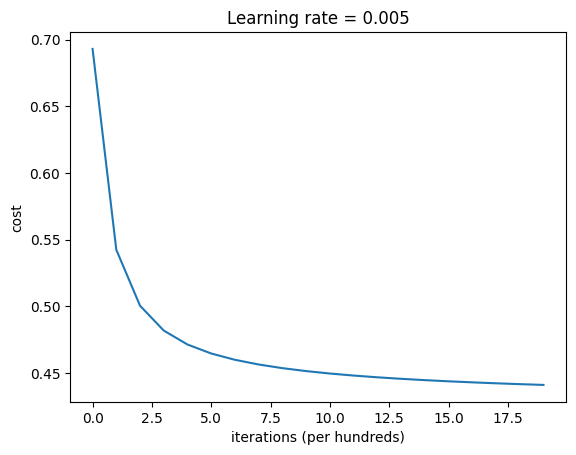

In [43]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    w = np.zeros((X_train.shape[0], 1))
    b = 0
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)
    w = parameters["w"]
    b = parameters["b"]
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    return d

X_train = df.values.T
Y_train = df_label.values.T
X_test = pd.read_csv('data1forEx1to4/test1_icu_data.csv')
X_test = pd.DataFrame(mm.transform(X_test), columns=X_test.columns).values.T
Y_test = pd.read_csv('data1forEx1to4/test1_icu_label.csv').values.T
d = model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

# plot the cost
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate = " + str(d["learning_rate"]))
plt.show()

In [ ]:
# multi-layer neural network

